In [1]:
%load_ext autoreload
%autoreload 2
import sys
from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")
ble = get_ble_controller()

2024-04-28 22:04:32,074 | INFO     |: info
2024-04-28 22:04:32,076 | WARNING  |: warning
2024-04-28 22:04:32,077 | ERROR    |: error
2024-04-28 22:04:32,078 | CRITICAL |: critical


In [2]:
ble.connect()

2024-04-28 22:04:33,038 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:89:c1:6d:24:4b
2024-04-28 22:04:38,079 | INFO     |: Connected to c0:89:c1:6d:24:4b


C:\Users\xyx07\Fast_Robot\Webpage\FR-2024\code\Lab6\PID1\base_ble.py:104: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [3]:
raw_message=[]
#add more arrays if needed
num = []
timeIMU = [] #in seconds
yaw = []
setYaw = []
yawPWM = []
def clear_data():
    # Clear all the sensor data arrays
    raw_message.clear()
    timeIMU.clear()
    yaw.clear()
    setYaw.clear()
    yawPWM.clear()
def notification_handler(uuid, byte_array):
    global timeIMU,xAcc,yAcc,zAcc,xGyr,yGyr,zGyr
    raw_message.append(byte_array)
    message = ble.bytearray_to_string(byte_array)
    if message=='IMU data received.':
        print(message)
    else: 
        readings = message.split('|')
        num.clear()
        for reading in readings:
            label, value = reading.split(':')
            num.append(float(value))
        if len(readings)==2:
                timeIMU.append(num[0]/1000)
                yaw.append(num[1])
        if len(readings)==4:
                timeIMU.append(num[0]/1000)
                yaw.append(num[1])
                setYaw.append(num[2])
                yawPWM.append(num[3])

In [4]:
ble.send_command(CMD.ECHO, "HiHello")
output1 = ble.receive_string(ble.uuid['RX_STRING'])
print(output1)

Robot says -> HiHello :)


In [158]:
speedL = -130
speedR = -int(speedL/1.12)
spd = str(speedL)+"|"+str(speedR)
ble.send_command(CMD.MOVE, spd)

In [159]:
ble.send_command(CMD.MOVE, "0|0")

In [35]:
Kp = 0.7
Ki = 0.003
Kd = 0
Angle = 180
minPWM = 130
maxPWM = 200
maxESum = 4000
cmd = str(Kp)+"|"+str(Ki)+"|"+str(Kd)+"|"+str(minPWM)+"|"+ str(maxPWM)+"|" +str(maxESum)
print(cmd)
ble.send_command(CMD.SET_YAW_PID, cmd)
ble.send_command(CMD.SET_ANGLE, str(Angle))

0.7|0.003|0|130|200|4000


In [36]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [37]:
clear_data()
ble.send_command(CMD.ORIENT_PID, "3000")

IMU data received.


In [38]:
ble.stop_notify(ble.uuid['RX_STRING'])

It takes: 2.999s to collect data.
Sample rate is about 192 samples/s.


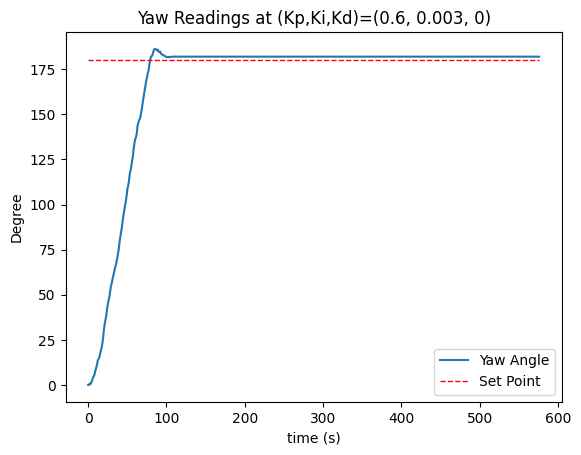

In [34]:
plt.plot(yaw, label = 'Yaw Angle')
plt.plot(setYaw, label = 'Set Point', color='r', lw = 1, ls='--')
plt.xlabel('time (s)')
plt.ylabel('Degree')
plt.title('Yaw Readings at (Kp,Ki,Kd)=('+str(Kp)+", "+str(Ki)+", "+str(Kd)+")")
plt.legend();
print(f"It takes: {round(timeIMU[-1]-timeIMU[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(timeIMU)/(timeIMU[-1]-timeIMU[0]))} samples/s.")

It takes: 3.003s to collect data.
Sample rate is about 183 samples/s.


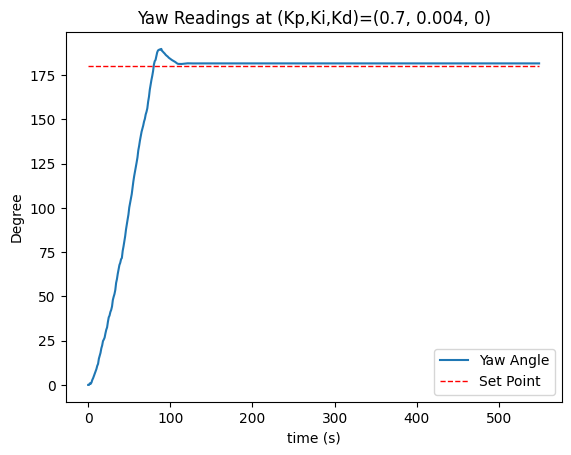

In [24]:
plt.plot(yaw, label = 'Yaw Angle')
plt.plot(setYaw, label = 'Set Point', color='r', lw = 1, ls='--')
plt.xlabel('time (s)')
plt.ylabel('Degree')
plt.title('Yaw Readings at (Kp,Ki,Kd)=('+str(Kp)+", "+str(Ki)+", "+str(Kd)+")")
plt.legend();
print(f"It takes: {round(timeIMU[-1]-timeIMU[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(timeIMU)/(timeIMU[-1]-timeIMU[0]))} samples/s.")

It takes: 7.999s to collect data.
Sample rate is about 153 samples/s.


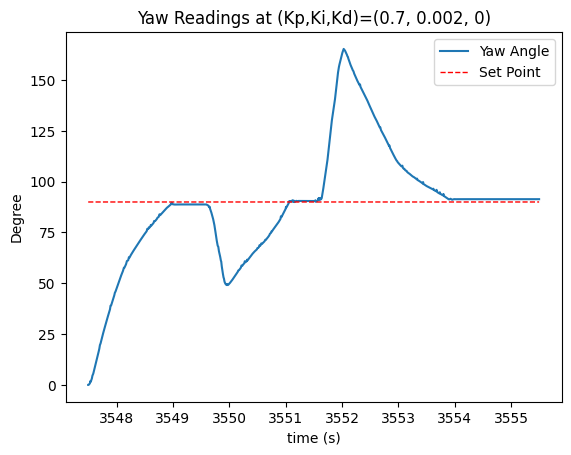

In [178]:
plt.plot(timeIMU,yaw, label = 'Yaw Angle')
plt.plot(timeIMU,setYaw, label = 'Set Point', color='r', lw = 1, ls='--')
plt.xlabel('time (s)')
plt.ylabel('Degree')
plt.title('Yaw Readings at (Kp,Ki,Kd)=('+str(Kp)+", "+str(Ki)+", "+str(Kd)+")")
plt.legend();
print(f"It takes: {round(timeIMU[-1]-timeIMU[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(timeIMU)/(timeIMU[-1]-timeIMU[0]))} samples/s.")

It takes: 3.0s to collect data.
Sample rate is about 205 samples/s.


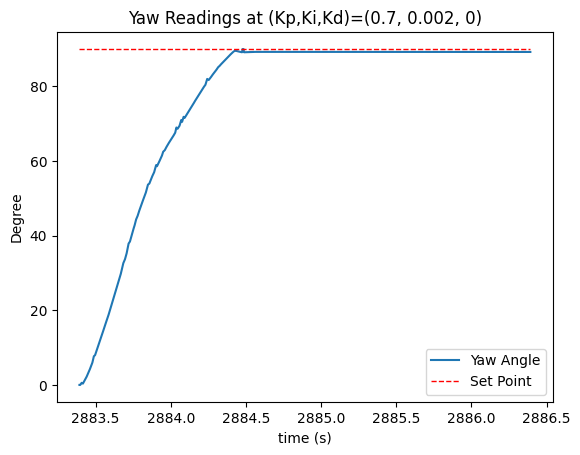

In [154]:
plt.plot(timeIMU,yaw, label = 'Yaw Angle')
plt.plot(timeIMU,setYaw, label = 'Set Point', color='r', lw = 1, ls='--')
plt.xlabel('time (s)')
plt.ylabel('Degree')
plt.title('Yaw Readings at (Kp,Ki,Kd)=('+str(Kp)+", "+str(Ki)+", "+str(Kd)+")")
plt.legend();
print(f"It takes: {round(timeIMU[-1]-timeIMU[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(timeIMU)/(timeIMU[-1]-timeIMU[0]))} samples/s.")

It takes: 8.002s to collect data.
Sample rate is about 102 samples/s.


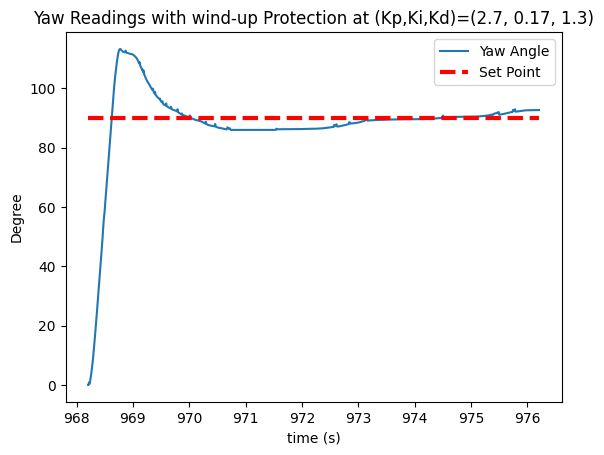

In [45]:
plt.plot(timeIMU,yaw, label = 'Yaw Angle')
plt.plot(timeIMU,setYaw, label = 'Set Point', color='r', lw = 3, ls='--')
plt.xlabel('time (s)')
plt.ylabel('Degree')
plt.title('Yaw Readings with wind-up Protection at (Kp,Ki,Kd)=('+str(Kp)+", "+str(Ki)+", "+str(Kd)+")")
plt.legend();
print(f"It takes: {round(timeIMU[-1]-timeIMU[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(timeIMU)/(timeIMU[-1]-timeIMU[0]))} samples/s.")

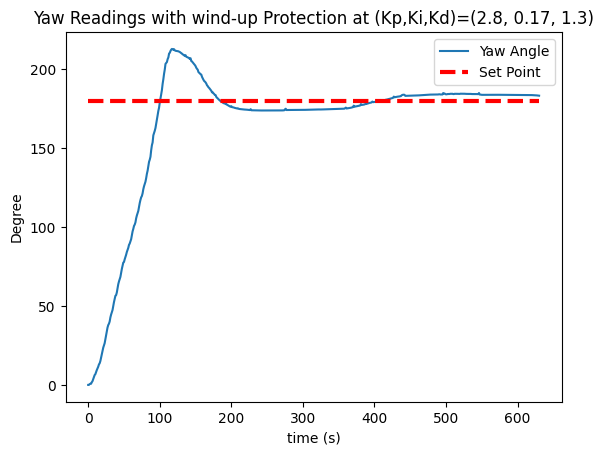

In [70]:
plt.plot(yaw, label = 'Yaw Angle')
plt.plot(setYaw, label = 'Set Point', color='r', lw = 3, ls='--')
plt.xlabel('time (s)')
plt.ylabel('Degree')
plt.title('Yaw Readings with wind-up Protection at (Kp,Ki,Kd)=('+str(Kp)+", "+str(Ki)+", "+str(Kd)+")")
plt.legend();


In [237]:
yaw[-100]

87.115

It takes: 4.005s to collect data.
Sample rate is about 104 samples/s.


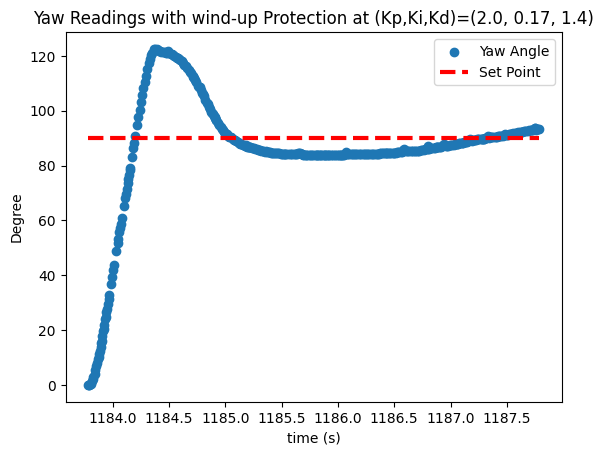

In [211]:
plt.scatter(timeIMU,yaw, label = 'Yaw Angle')
plt.plot(timeIMU,setYaw, label = 'Set Point', color='r', lw = 3, ls='--')
plt.xlabel('time (s)')
plt.ylabel('Degree')
plt.title('Yaw Readings with wind-up Protection at (Kp,Ki,Kd)=('+str(Kp)+", "+str(Ki)+", "+str(Kd)+")")
plt.legend();
print(f"It takes: {round(timeIMU[-1]-timeIMU[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(timeIMU)/(timeIMU[-1]-timeIMU[0]))} samples/s.")

It takes: 4.001s to collect data.
Sample rate is about 101 samples/s.


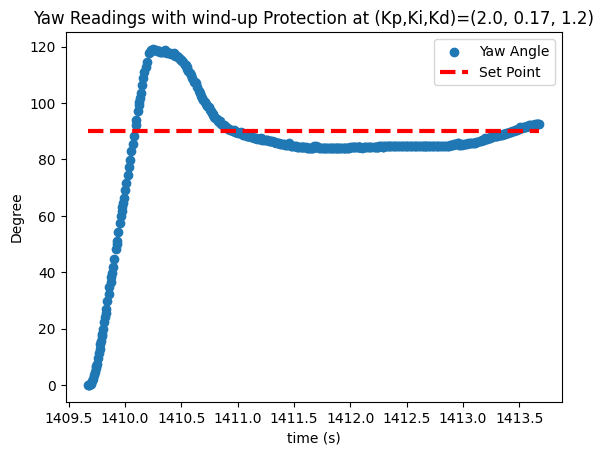

In [231]:
plt.scatter(timeIMU,yaw, label = 'Yaw Angle')
plt.plot(timeIMU,setYaw, label = 'Set Point', color='r', lw = 3, ls='--')
plt.xlabel('time (s)')
plt.ylabel('Degree')
plt.title('Yaw Readings with wind-up Protection at (Kp,Ki,Kd)=('+str(Kp)+", "+str(Ki)+", "+str(Kd)+")")
plt.legend();
print(f"It takes: {round(timeIMU[-1]-timeIMU[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(timeIMU)/(timeIMU[-1]-timeIMU[0]))} samples/s.")

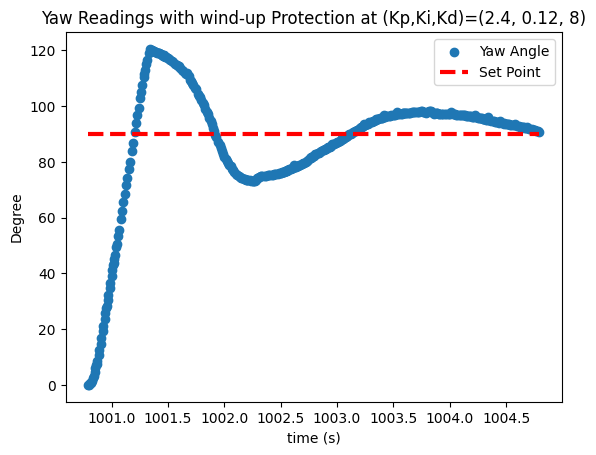

In [77]:
plt.scatter(timeIMU,yaw, label = 'Yaw Angle')
plt.plot(timeIMU,setYaw, label = 'Set Point', color='r', lw = 3, ls='--')
plt.xlabel('time (s)')
plt.ylabel('Degree')
plt.title('Yaw Readings with wind-up Protection at (Kp,Ki,Kd)=('+str(Kp)+", "+str(Ki)+", "+str(Kd)+")")
plt.legend();

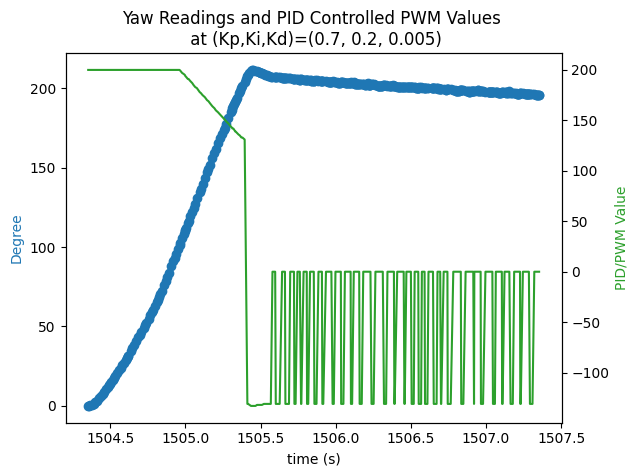

In [102]:
fig, ax1 = plt.subplots() 
color = 'tab:blue'
ax1.set_xlabel('time (s)') 
ax1.set_ylabel('Degree', color = color) 
ax1.scatter(timeIMU,yaw, label = 'Yaw Angle', color=color)
ax2 = ax1.twinx() 
color = 'tab:green'
ax2.set_ylabel('PID/PWM Value', color = color) 
ax2.plot(timeIMU,yawPWM, label = 'PID/PWM Value',color=color)
plt.title('Yaw Readings and PID Controlled PWM Values \n at (Kp,Ki,Kd)=('+str(Kp)+", "+str(Ki)+", "+str(Kd)+")")
plt.show();

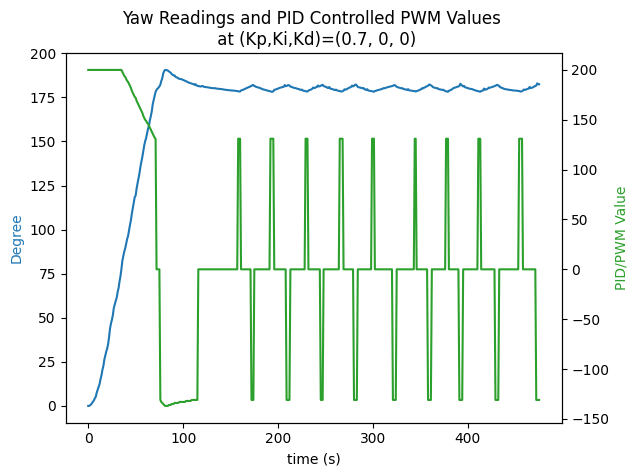

In [84]:
fig, ax1 = plt.subplots() 
color = 'tab:blue'
ax1.set_xlabel('time (s)') 
ax1.set_ylabel('Degree', color = color) 
ax1.plot(yaw, label = 'Yaw Angle', color=color)
ax2 = ax1.twinx() 
color = 'tab:green'
ax2.set_ylabel('PID/PWM Value', color = color) 
ax2.plot(yawPWM, label = 'PID/PWM Value',color=color)
plt.title('Yaw Readings and PID Controlled PWM Values \n at (Kp,Ki,Kd)=('+str(Kp)+", "+str(Ki)+", "+str(Kd)+")")
plt.show();

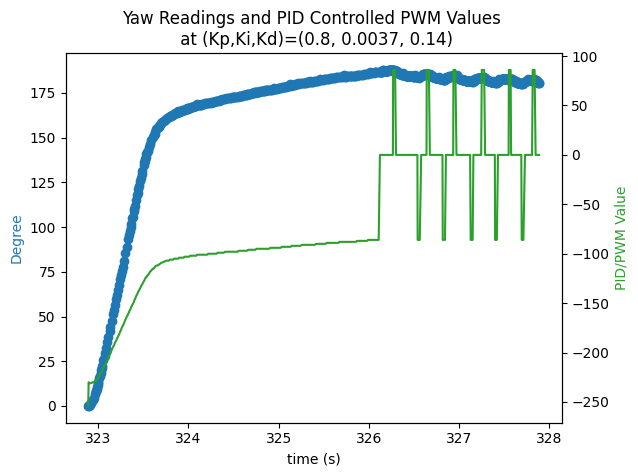

In [117]:
fig, ax1 = plt.subplots() 
color = 'tab:blue'
ax1.set_xlabel('time (s)') 
ax1.set_ylabel('Degree', color = color) 
ax1.scatter(timeIMU,yaw, label = 'Yaw Angle', color=color)
ax2 = ax1.twinx() 
color = 'tab:green'
ax2.set_ylabel('PID/PWM Value', color = color) 
ax2.plot(timeIMU,yawPWM, label = 'PID/PWM Value',color=color)
plt.title('Yaw Readings and PID Controlled PWM Values \n at (Kp,Ki,Kd)=('+str(Kp)+", "+str(Ki)+", "+str(Kd)+")")
plt.show();

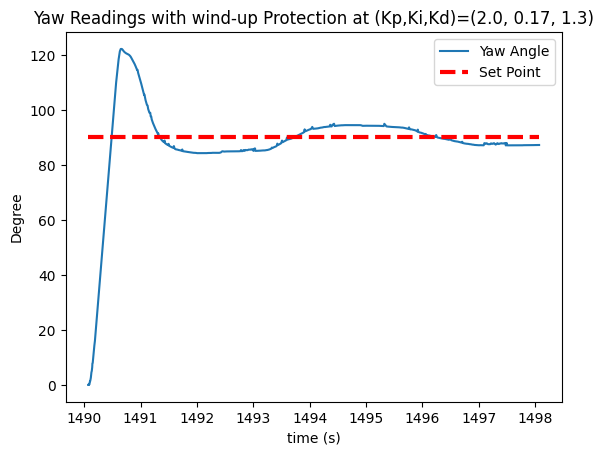

In [238]:
plt.plot(timeIMU,yaw, label = 'Yaw Angle')
plt.plot(timeIMU,setYaw, label = 'Set Point', color='r', lw = 3, ls='--')
plt.xlabel('time (s)')
plt.ylabel('Degree')
plt.title('Yaw Readings with wind-up Protection at (Kp,Ki,Kd)=('+str(Kp)+", "+str(Ki)+", "+str(Kd)+")")
plt.legend();

In [58]:
clear_data()
ble.send_command(CMD.ORIENT_PID, "3000")

IMU data received.
IMU data received.


In [57]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)


In [49]:
print(f"It takes: {round(timeIMU[-1]-timeIMU[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(timeIMU)/(timeIMU[-1]-timeIMU[0]))} samples/s.")

It takes: 3.005s to collect data.
Sample rate is about 272 samples/s.


In [165]:
yaw[-1]

179.339

In [53]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [24]:
# Disconnect
ble.disconnect()

2024-03-13 16:25:17,601 | INFO     |: Disconnected from C0:89:C1:6D:24:4B
